# Company Bankrupcy

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import os, types
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('data.csv')


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Text(0.5, 1.0, 'Null Values in Data Frame')

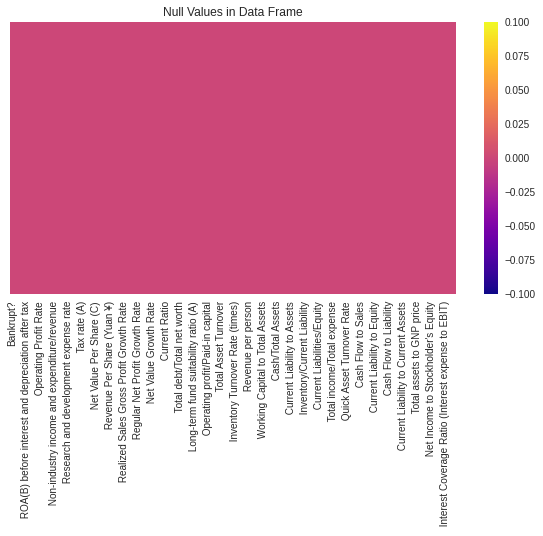

In [4]:
# plot missing values
plt.style.use('seaborn')
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'plasma')
plt.title('Null Values in Data Frame')

In [5]:
df.columns= [i.lower().strip().replace(' ', '_') for i in df.columns]
df.columns

Index(['bankrupt?', 'roa(c)_before_interest_and_depreciation_before_interest',
       'roa(a)_before_interest_and_%_after_tax',
       'roa(b)_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre-tax_net_interest_rate',
       'after-tax_net_interest_rate',
       'non-industry_income_and_expenditure/revenue',
       'continuous_interest_rate_(after_tax)', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest-bearing_debt_interest_rate', 'tax_rate_(a)',
       'net_value_per_share_(b)', 'net_value_per_share_(a)',
       'net_value_per_share_(c)', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_(yuan_¥)',
       'operating_profit_per_share_(yuan_¥)',
       'per_share_net_profit_before_tax_(yuan_¥)',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after-tax

In [6]:
import plotly.graph_objects as go

print(df['bankrupt?'].value_counts())
labels = df['bankrupt?'].unique()
values = df['bankrupt?'].value_counts().sort_values(ascending = True)

fig = go.Figure(data = [
    go.Pie(
    labels = labels,
    values = values,
    hole = .5)
])

fig.update_layout(title_text = "Bankrupt Distribution")
fig.show()

0    6599
1     220
Name: bankrupt?, dtype: int64


* fractional columns: The columns that contain the values between 0 and 1 .
* non-fractional columns : They are columns that contain different values.

In [7]:
##  separate between fractional columns and non-fraction columns
def get_fraction_valued_columns(df):
    my_columns  = []
    for col in df.columns:
        if (df[col].max()<=1) & (df[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = get_fraction_valued_columns(df=df.drop(['bankrupt?'],axis=1))
non_fractional_columns = df.drop(['bankrupt?'],axis=1).columns.difference(fractional_columns)
print("# Fractional  Columns number are:",len(fractional_columns),"\t","# Non  Fractional Columns number are:", len(non_fractional_columns))

# Fractional  Columns number are: 71 	 # Non  Fractional Columns number are: 24


In [8]:
df[non_fractional_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
accounts_receivable_turnover,6819.0,1.278971e+07,2.782598e+08,0.0,7.101336e-04,9.678107e-04,1.454759e-03,9.740000e+09
allocation_rate_per_person,6819.0,1.125579e+07,2.945063e+08,0.0,4.120529e-03,7.844373e-03,1.502031e-02,9.570000e+09
average_collection_days,6819.0,9.826221e+06,2.563589e+08,0.0,4.386530e-03,6.572537e-03,8.972876e-03,9.730000e+09
cash/current_liability,6819.0,3.715999e+07,5.103509e+08,0.0,1.973008e-03,4.903886e-03,1.280557e-02,9.650000e+09
cash_turnover_rate,6819.0,2.471977e+09,2.938623e+09,0.0,2.735337e-04,1.080000e+09,4.510000e+09,1.000000e+10
current_asset_turnover_rate,6819.0,1.195856e+09,2.821161e+09,0.0,1.456236e-04,1.987816e-04,4.525945e-04,1.000000e+10
current_ratio,6819.0,4.032850e+05,3.330216e+07,0.0,7.555047e-03,1.058717e-02,1.626953e-02,2.750000e+09
fixed_assets_to_assets,6819.0,1.220121e+06,1.007542e+08,0.0,8.536037e-02,1.968810e-01,3.722000e-01,8.320000e+09
fixed_assets_turnover_frequency,6819.0,1.008596e+09,2.477557e+09,0.0,2.330013e-04,5.930942e-04,3.652371e-03,9.990000e+09
interest-bearing_debt_interest_rate,6819.0,1.644801e+07,1.082750e+08,0.0,2.030203e-04,3.210321e-04,5.325533e-04,9.900000e+08


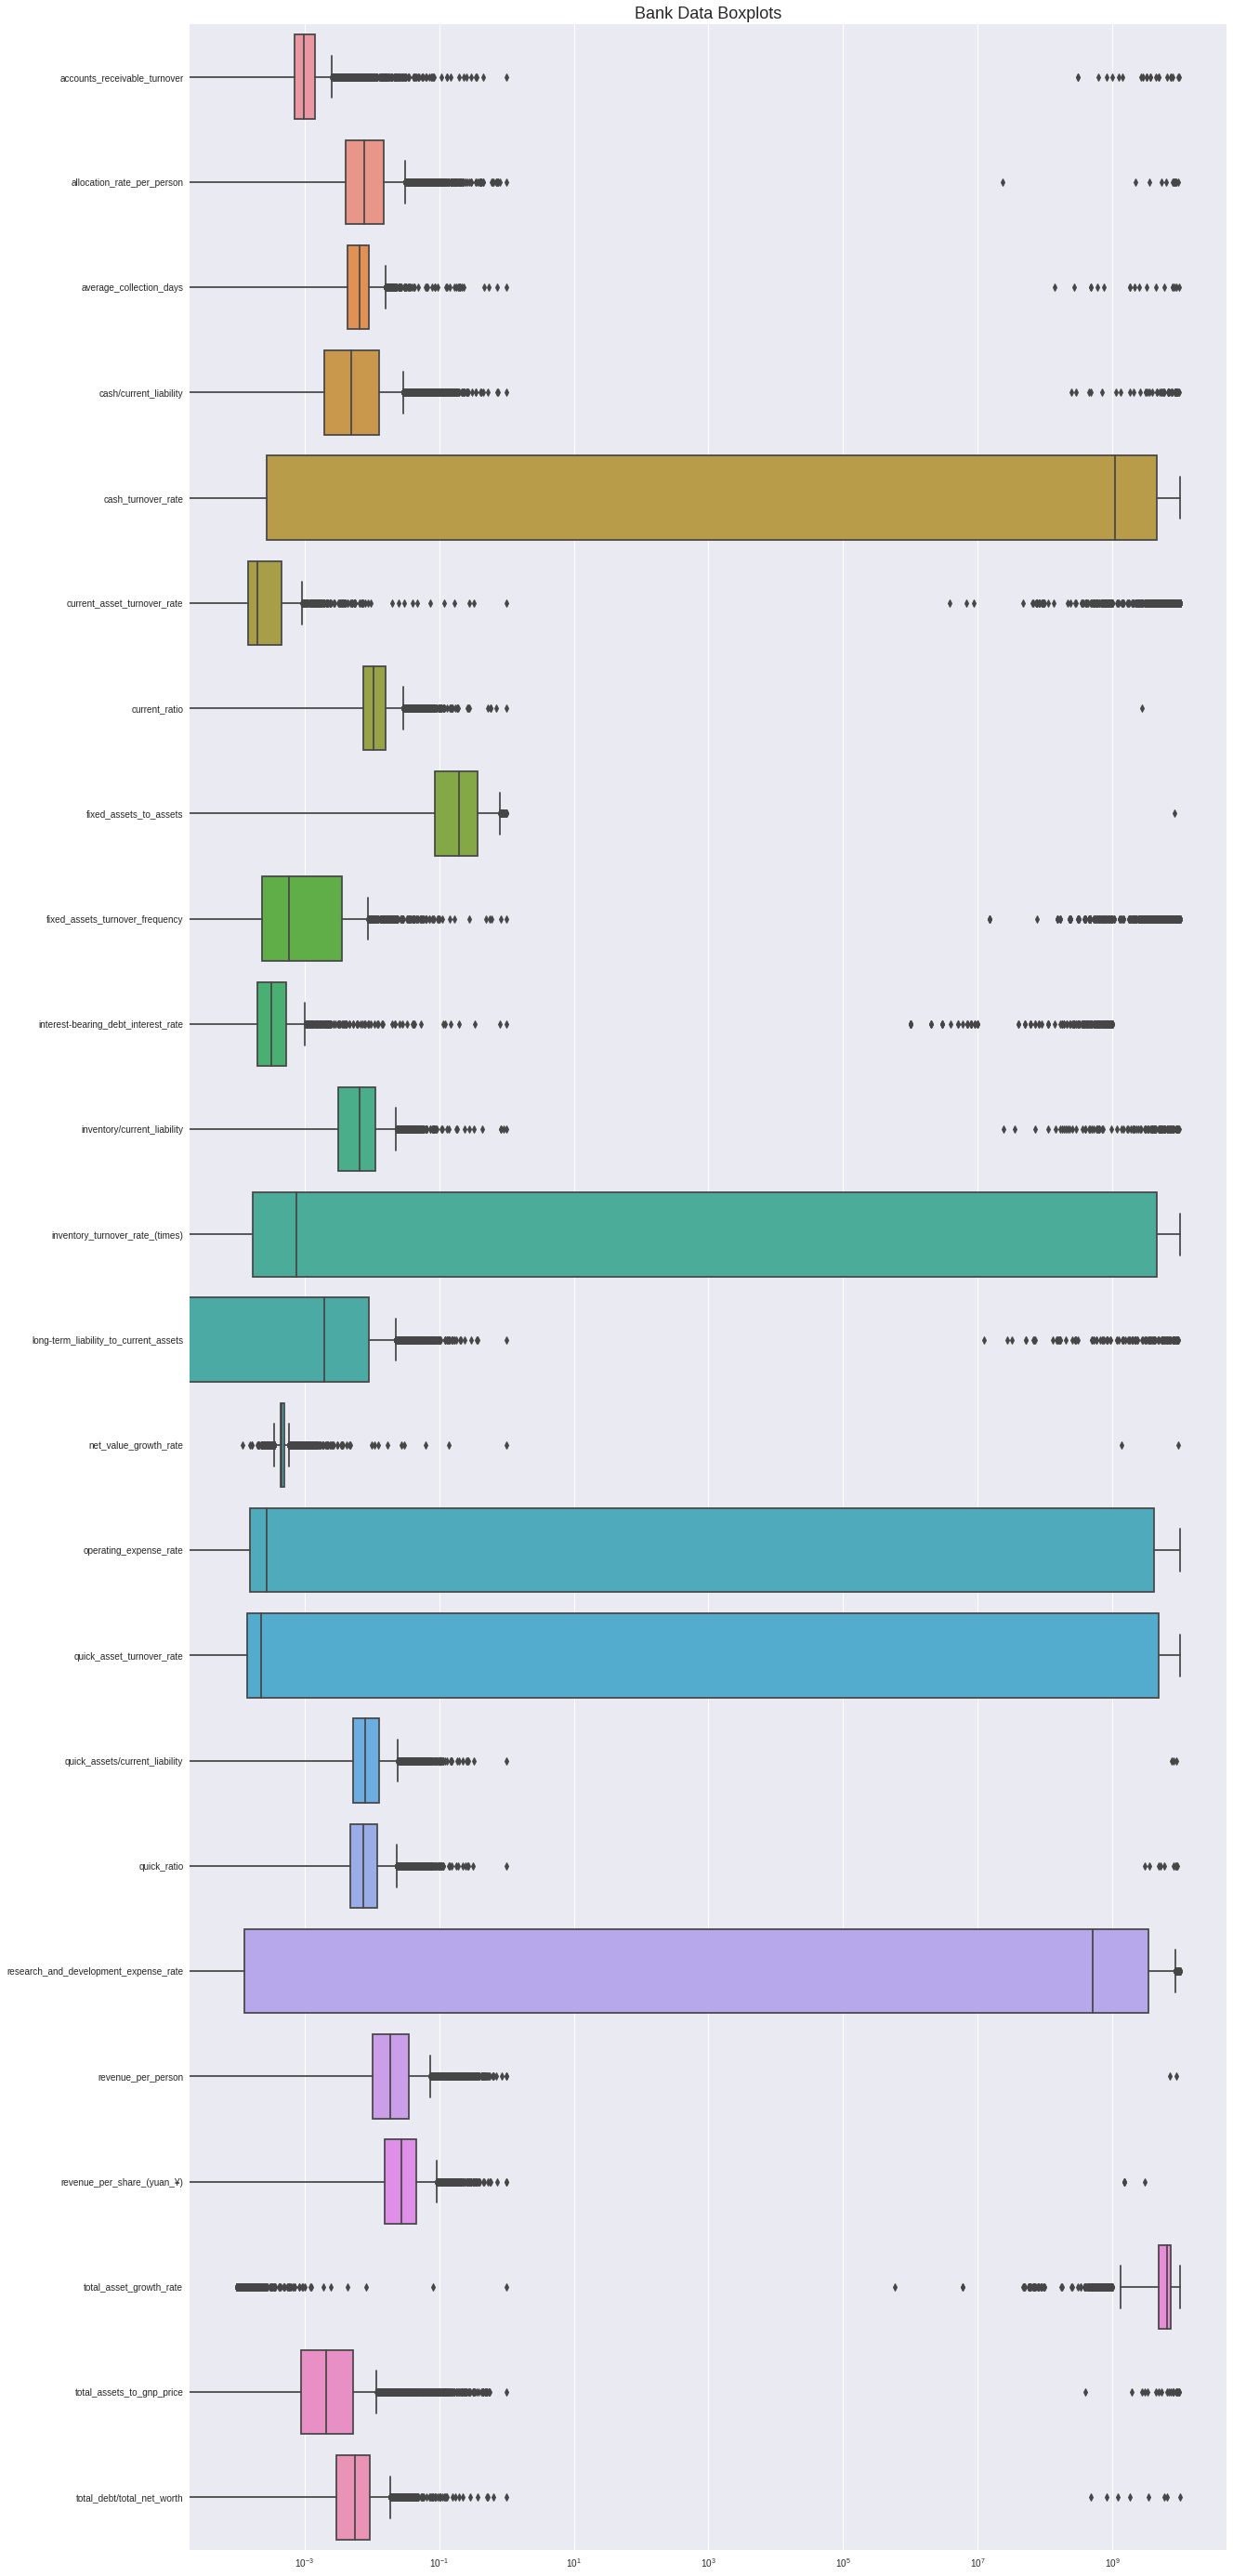

In [9]:
plt.figure(figsize = (20,50))
ax =sns.boxplot(data = df[non_fractional_columns], orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

### Data Preprocessing

In [10]:
y = df['bankrupt?']
X = df.drop(columns=['bankrupt?'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
scaler = StandardScaler()
models = scaler.fit(X_train)
X_train_prepared = models.transform(X_train)
X_test_prepared = models.transform(X_test)

In [13]:
X_train_prepared

array([[-0.11702908, -0.24729279, -0.1523761 , ...,  0.10860704,
         0.        , -0.49725421],
       [ 0.01547354,  0.04891765,  0.0780552 , ...,  0.00589797,
         0.        , -0.41533037],
       [ 0.05139292,  0.02900434,  0.01048512, ...,  0.01312865,
         0.        , -0.12205347],
       ...,
       [ 0.02664846,  0.04725821,  0.04773529, ...,  0.03883393,
         0.        , -0.36039024],
       [ 1.23912724,  1.29847768,  1.28911894, ..., -0.01003481,
         0.        ,  0.2074778 ],
       [ 1.19362935,  1.04541273,  0.91055324, ..., -0.01291977,
         0.        ,  0.05666213]])

In [14]:
X_train_prepared.shape

(5455, 95)

In [15]:
X_test_prepared.shape

(1364, 95)

In [16]:
train_df_temp = pd.DataFrame(X_train_prepared, columns = list(X.columns))
train_df_temp.head()

,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),...,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),net_income_flag,equity_to_liability
0,-0.117029,-0.247293,-0.152376,-0.494298,-0.502808,0.019304,0.018755,0.019750,-0.009301,0.018216,...,-0.166341,-0.046338,-0.022838,-0.494118,0.015833,0.135359,-0.022084,0.108607,0.0,-0.497254
1,0.015474,0.048918,0.078055,0.082690,0.083870,0.022150,0.021383,0.022672,-0.010948,0.021308,...,0.071288,-0.046338,-0.001396,0.082664,0.063658,0.005628,-0.044865,0.005898,0.0,-0.415330
2,0.051393,0.029004,0.010485,0.361957,0.352781,0.026728,0.027196,0.025919,-0.010425,0.025182,...,0.042251,-0.046338,-0.017941,0.361985,0.040348,-0.176436,-0.043660,0.013129,0.0,-0.122053
3,-0.093083,0.052237,-0.117725,-0.572214,-0.571781,0.020520,0.018707,0.019647,-0.012362,0.017988,...,0.050715,-0.046338,0.002672,-0.572190,0.098091,0.415558,-0.038664,0.040467,0.0,-0.582733
4,-0.454671,-0.173448,-0.402732,-0.427864,-0.427267,0.018557,0.018775,0.019904,-0.007440,0.017582,...,-0.084045,-0.046338,-0.008028,-0.427715,0.035049,0.103370,-0.038209,0.042765,0.0,-0.481160


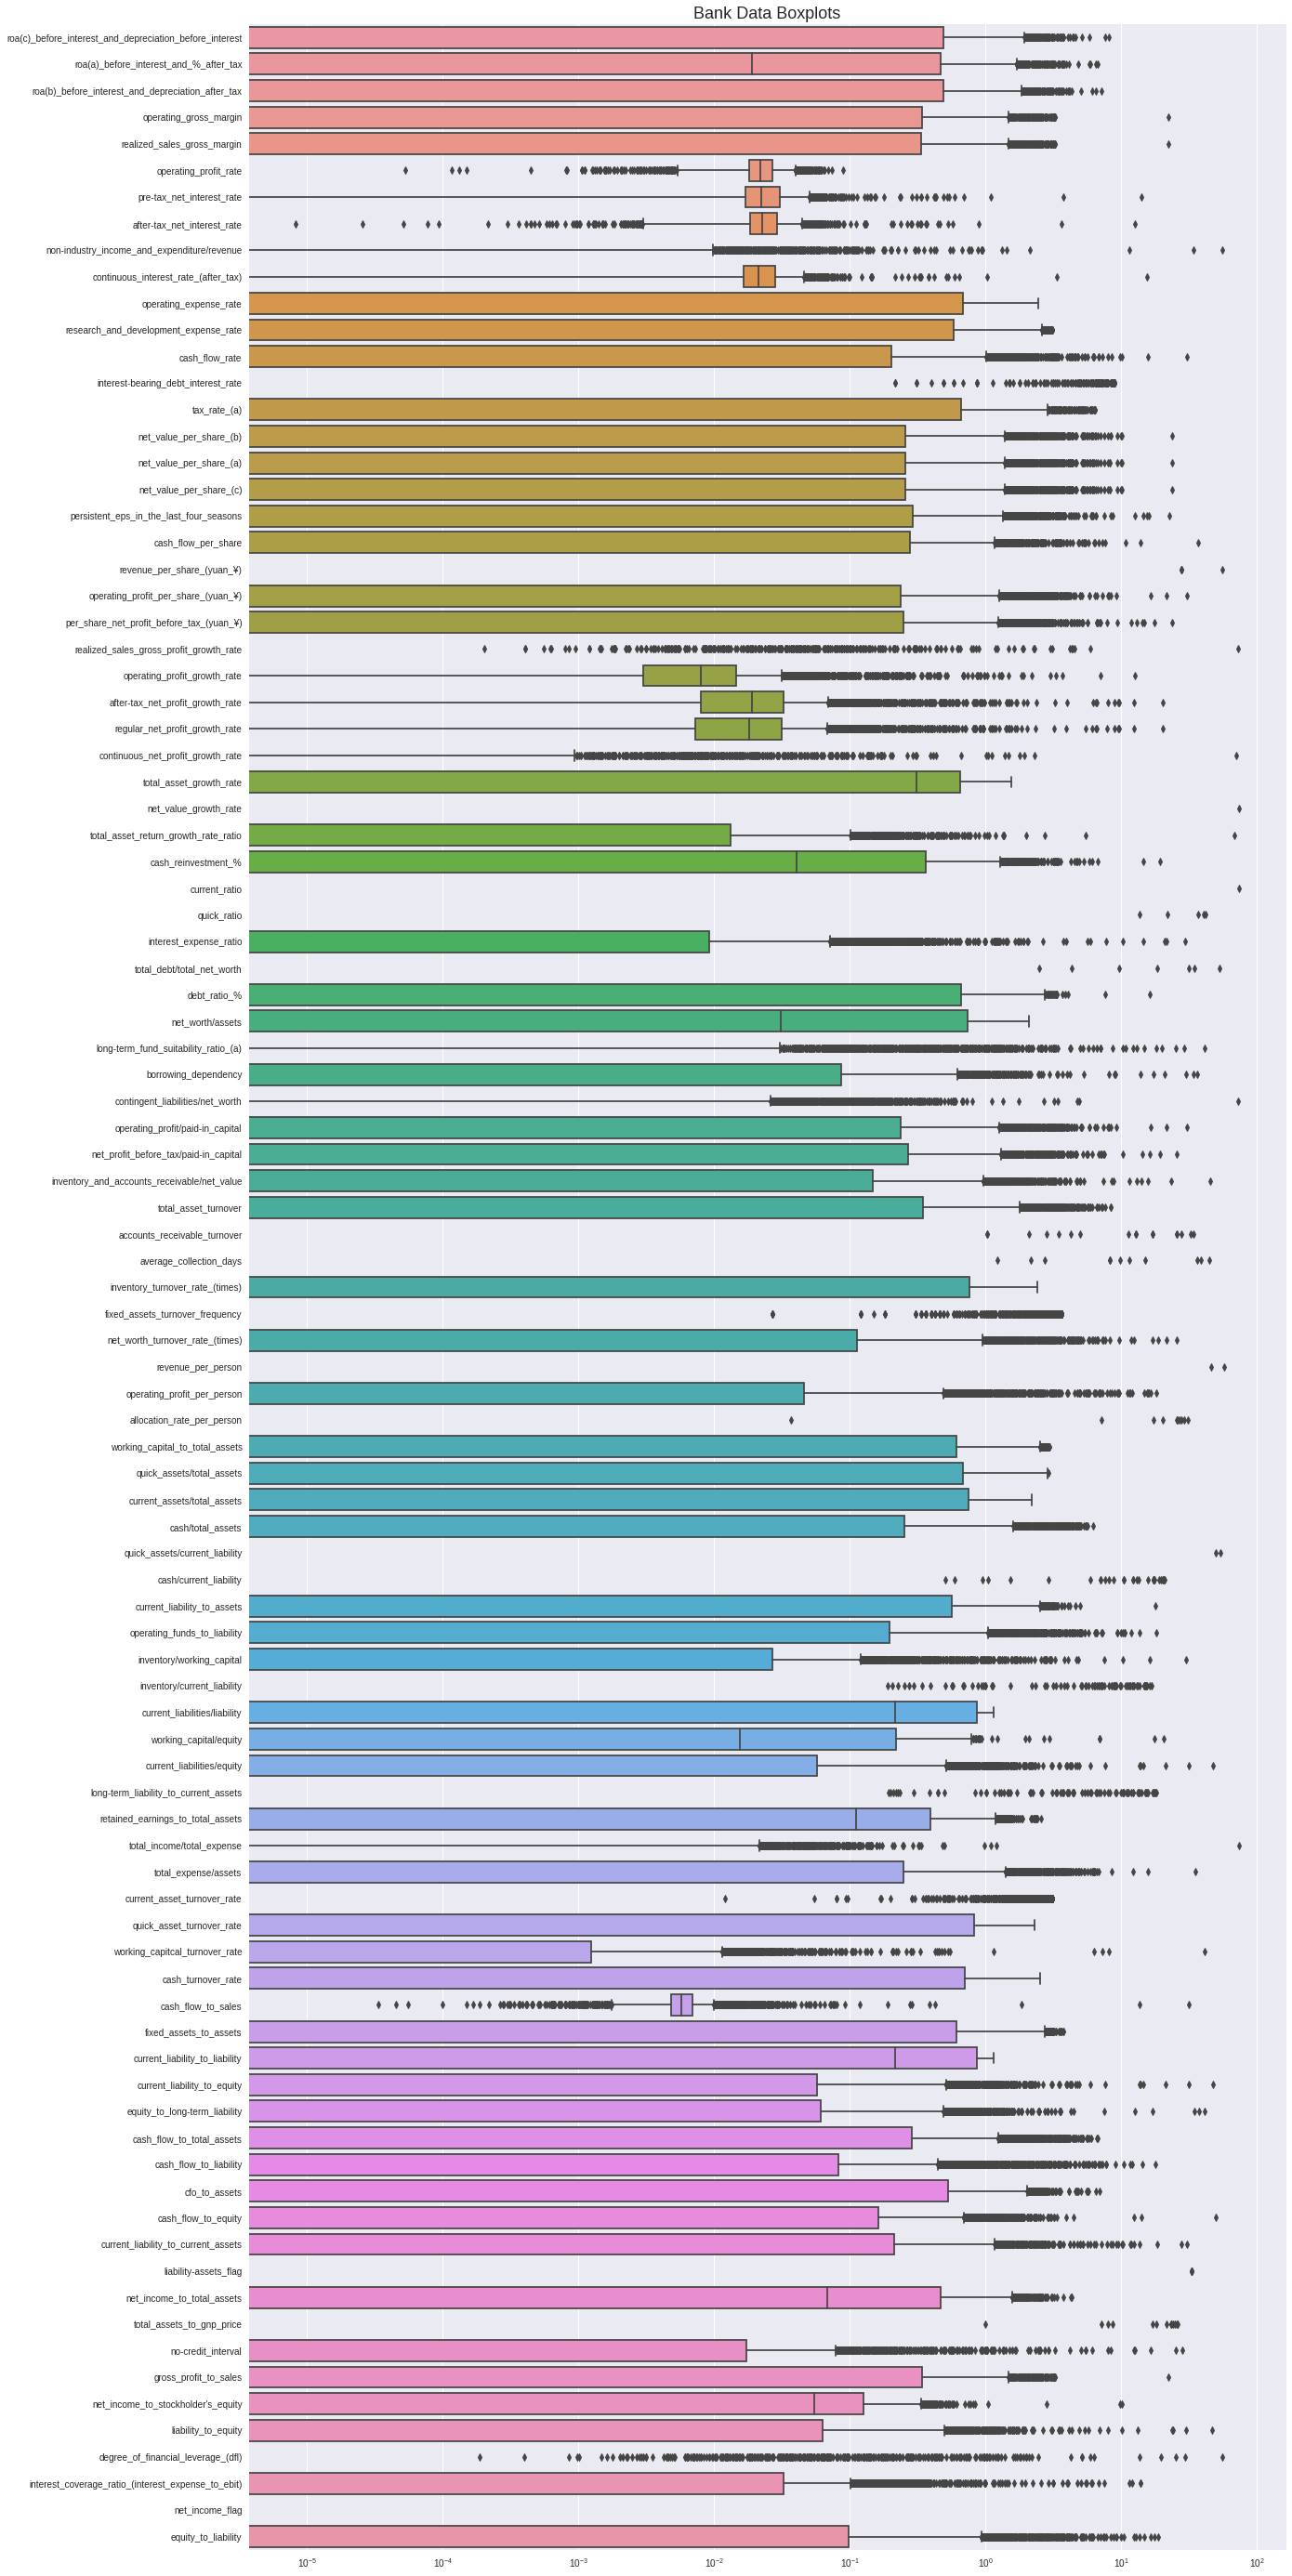

In [17]:
plt.figure(figsize = (20,50))
ax =sns.boxplot(data = train_df_temp, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

### Model

In [18]:
from keras_tuner import HyperModel
class HyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 100, 460, 8),
                activation='relu',
                input_shape=input_shape
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        
        model.add(
            layers.Dense(
                units=hp.Int('units', 100, 460, 8),
                activation='relu'
            )
        )

        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
                
        model.add(layers.Dense(1, activation= 'sigmoid'))
        
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate), metrics=['accuracy'])
        
        
        return model

In [19]:
input_shape = (X_train_prepared.shape[1],)
hypermodel = HyperModel(input_shape)

In [20]:
from keras_tuner import BayesianOptimization

tuner_bo = BayesianOptimization(
            hypermodel,
            objective='val_loss',
            max_trials=30,
            seed=42,
            executions_per_trial=2
        )
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
tuner_bo.search(X_train_prepared, y_train, epochs=100, validation_split=0.2, verbose=0, callbacks=[stop_early])
best_model = tuner_bo.get_best_models(num_models=1)[0]
evaluation = best_model.evaluate(X_test_prepared, y_test)
evaluation

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit
43/43 [==============================] - 1s 2ms/step - loss: 1952561.1250 - accuracy: 0.9648


[1952561.125, 0.9648093581199646]

In [21]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               9600      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 19,801
Trainable params: 19,801
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Get the optimal hyperparameters
best_hps=tuner_bo.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in th densely-connected
layers is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in th densely-connected
layers is 100 and the optimal learning rate for the optimizer
is 0.01.



In [23]:
best_hps.values

{'dropout': 0.0, 'learning_rate': 0.01, 'units': 100}

In [24]:
history = best_model.fit(X_train_prepared, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
137/137 [==============================] - 2s 6ms/step - loss: 0.0833 - accuracy: 0.9723 - val_loss: 0.0895 - val_accuracy: 0.9679
Epoch 2/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0798 - accuracy: 0.9730 - val_loss: 0.0892 - val_accuracy: 0.9679
Epoch 3/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9725 - val_loss: 0.0906 - val_accuracy: 0.9688
Epoch 4/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0757 - accuracy: 0.9730 - val_loss: 0.0897 - val_accuracy: 0.9670
Epoch 5/100
137/137 [==============================] - 1s 4ms/step - loss: 0.0744 - accuracy: 0.9734 - val_loss: 0.0898 - val_accuracy: 0.9670
Epoch 6/100
137/137 [==============================] - 1s 5ms/step - loss: 0.0731 - accuracy: 0.9736 - val_loss: 0.0907 - val_accuracy: 0.9688
Epoch 7/100
137/137 [==============================] - 0s 4ms/step - loss: 0.0721 - accuracy: 0.9739 - val_loss: 0.0883 - val_accuracy: 0.9670

In [25]:
val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 35


In [26]:
history = best_model.fit(X_train_prepared, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/35
137/137 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9867 - val_loss: 0.0949 - val_accuracy: 0.9652
Epoch 2/35
137/137 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9867 - val_loss: 0.0922 - val_accuracy: 0.9652
Epoch 3/35
137/137 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9874 - val_loss: 0.0948 - val_accuracy: 0.9643
Epoch 4/35
137/137 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9872 - val_loss: 0.0930 - val_accuracy: 0.9661
Epoch 5/35
137/137 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9869 - val_loss: 0.0939 - val_accuracy: 0.9652
Epoch 6/35
137/137 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9874 - val_loss: 0.0933 - val_accuracy: 0.9661
Epoch 7/35
137/137 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9879 - val_loss: 0.0978 - val_accuracy: 0.9652
Epoch 

In [27]:
eval_result = best_model.evaluate(X_test_prepared, y_test)
eval_result

43/43 [==============================] - 0s 1ms/step - loss: 15097517.0000 - accuracy: 0.9619


[15097517.0, 0.9618768095970154]

In [28]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

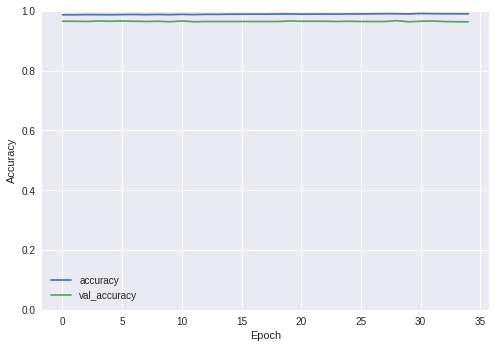

In [29]:
plot_accuracy(history)

In [30]:
y_pred = best_model.predict(X_test).flatten()
y_pred

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [31]:
y_test_arr = y_test.to_numpy()
y_pred = y_pred.astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

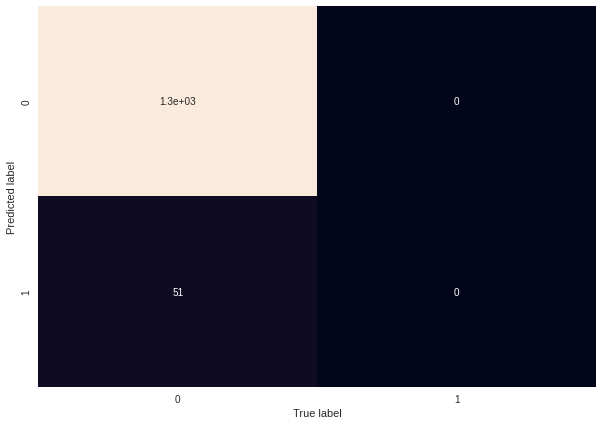

In [32]:
from sklearn.metrics import confusion_matrix


def plot_conf_mat(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(10,7))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_pred)

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_arr, y_pred)

0.9626099706744868